In [1]:
from time import sleep

from simulation import Warehouse, RobotCoalition

from coalition.dutch_auction import DutchAuction, RobotTaskPair

import matplotlib.pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


ModuleNotFoundError: No module named 'script'

In [7]:
data = []
data_final = []

h=10

energy_sum = 0

cc = 0

for step in range(9):
    size= step/h + 1
    size=int(size)
    for iteration in range(100):
        w1 = Warehouse(200, 100, visualize=False)
        w1.generate_random_boxes(10 * (step+1))
        w1.generate_random_robots(20 * (step+1))
        r1 = list(w1.robots)[0:2]
        box1 = list(w1.boxes_left)[0]
        
        cost_weights = [0.2, 0.8]

        temp_pairs_sum = 0

        # counter = 0

        coalition = DutchAuction(w1.robots, w1.boxes_left,
                                    cost_weights=cost_weights)

        while len(w1.boxes_left) > 0:
            

            coalition.task_pairs = []

            tasks_pairs = coalition.start_auction()

            if tasks_pairs is None:
                break
            
            for pair in tasks_pairs:
                #print(pair)
                energy_sum = energy_sum + pair.sum_cost

            pair_set = [RobotCoalition(set(pair.robot), pair.box)
                        for pair in tasks_pairs]

            temp_pairs_sum = temp_pairs_sum + len(tasks_pairs)

            coal1 = set(pair_set)
            w1.coalitions = coal1

            while len(w1.boxes_done) < temp_pairs_sum:
                w1.step(1000)
                #sleep(0.01)
        
    # print(f"FINAL ENERGY: {energy_sum}")
        data.append(energy_sum)
        print(f"Final energy:{energy_sum}")
        energy_sum = 0
    
    cc=cc +1
    data = []
    data_final.append(data)
    print(f"Assigment number {cc}")

Final energy:195.53729792206906
Final energy:163.16906217081194
Final energy:101.04568930223967
Final energy:174.42120615287917
Final energy:145.0728721793019
Final energy:156.37148396888063
Final energy:169.09525348810735
Final energy:105.9509232477723
Final energy:148.0226848696398
Final energy:203.0020334277275
Final energy:136.49464003319218
Final energy:118.28183444131227
Final energy:140.7923186585108
Final energy:182.35157140174252
Final energy:136.38942687892933
Final energy:149.57487088295443
Final energy:169.7280898365119
Final energy:162.50386405787808
Final energy:231.25422313972882
Final energy:107.40632527094235
Final energy:116.26344017406865
Final energy:224.9395995377196
Final energy:134.52604876210464
Final energy:201.2020230153404
Final energy:186.59169529645322
Final energy:156.51085620744485
Final energy:166.06813914972304
Final energy:152.10297859461383
Final energy:133.57482183851212
Final energy:126.42341330086363
Final energy:131.43043406497836
Final energy:169

In [14]:
for pr in data_final:
    print(pr)

print()

[197.00426522772966, 356.8827673910444, 512.6056628952168, 676.8038925844603, 876.0133844509392, 996.488450102099, 1239.8548147976537, 1360.5012661240228, 1490.1629758221982, 1655.2671625258422, 1842.1540721943136, 1972.8208240327633, 2183.809173045434, 2385.2698425255708, 2607.8494863184724, 2813.6242360155807, 2977.737745379181, 3148.654945367498, 3359.492658377725, 3514.2449329241963, 3651.500844700922, 3771.1662719677415, 3953.7208509935604, 4218.279813399436, 4326.57925516545, 4449.651355546198, 4617.868591298829, 4838.7723839511245, 5002.239486958059, 5130.6354302517575, 5290.443089240734, 5442.290409517245, 5568.662406535339, 5722.6551589855635, 5905.072423190269, 6059.1023660153905, 6233.438423205838, 6366.680410402602, 6486.676950203352, 6636.562574497857, 6787.255620728423, 6971.446487629744, 7187.829379962482, 7344.637570724272, 7484.251504486676, 7654.863697033012, 7766.96417252755, 7932.149861352185, 8154.017927014141, 8323.162944697116, 8437.37613405034, 8617.160367868213

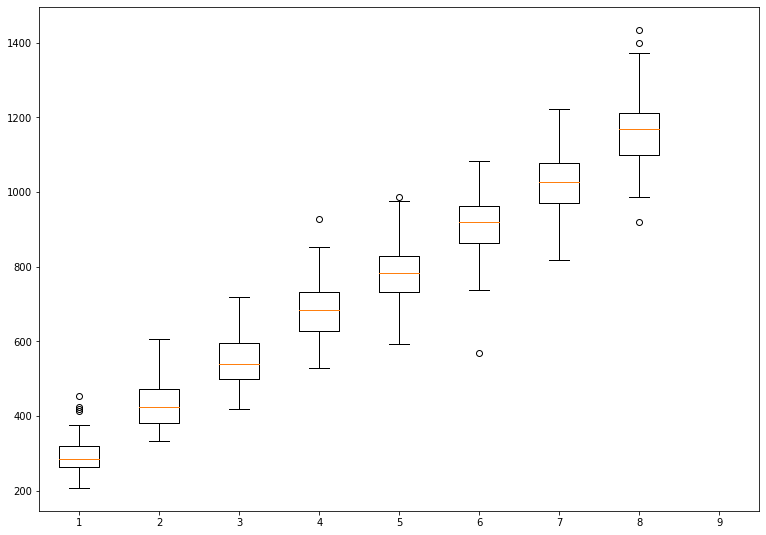

In [8]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_final)
plt.show()
